In [1]:
import pandas as pd

import numpy as np

import sklearn

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('User_Data.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
print(df.columns)

print(df.corr())

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
                  User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000


# labelEncoding

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.Gender=le.fit_transform(df.Gender)

df.Gender.head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32

In [13]:
x=df.drop(['Purchased','User ID',],axis='columns')

print(x)

y=df['Purchased']

print(y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
5         1   27            58000
6         0   27            84000
7         0   32           150000
8         1   25            33000
9         0   35            65000
10        0   26            80000
11        0   26            52000
12        1   20            86000
13        1   32            18000
14        1   18            82000
15        1   29            80000
16        1   47            25000
17        1   45            26000
18        1   46            28000
19        0   48            29000
20        1   45            22000
21        0   47            49000
22        1   48            41000
23        0   45            22000
24        1   46            23000
25        1   47            20000
26        1   49            28000
27        0   47            30000
28        1   

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x.drop('Gender',axis=1,inplace=True)

x=scaler.fit_transform(x)

print(x)


[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

# Vizualization

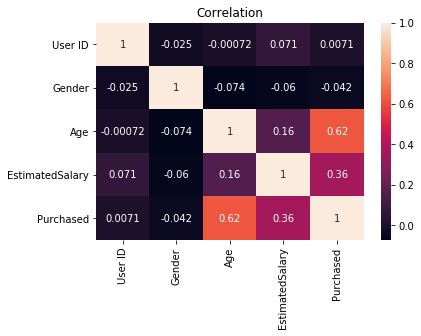

In [15]:
sns.heatmap(df.corr(),annot=True)

plt.title('Correlation')

plt.show()

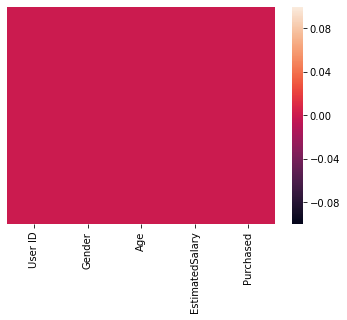

In [16]:
sns.heatmap(df.isnull(),yticklabels=False)

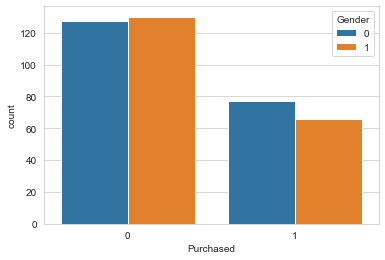

In [17]:
sns.set_style('whitegrid')

sns.countplot(x='Purchased',hue='Gender',data=df)

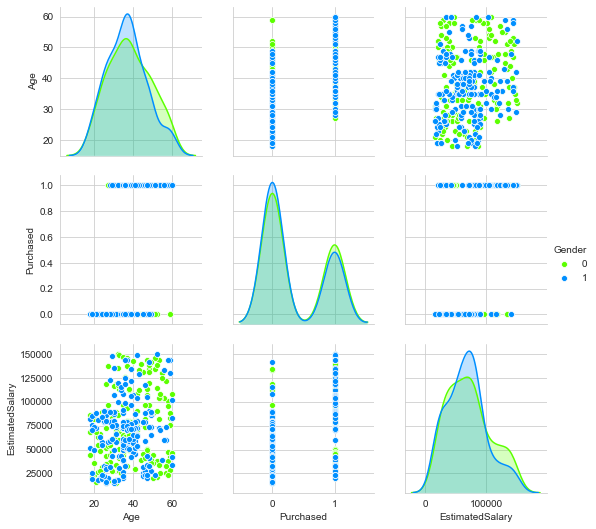

In [18]:
sns.pairplot(df,hue='Gender',vars=['Age','Purchased','EstimatedSalary'],palette='gist_rainbow')

# Detecting Outliers

In [19]:
max_threshold=df['Age'].quantile(0.95)

print(max_threshold)

min_threshold=df['Age'].quantile(0.05)

print(min_threshold)

df[df['Age']>max_threshold]

57.049999999999955
21.0


,User ID,Gender,Age,EstimatedSalary,Purchased
64,15605000,0,59,83000,0
204,15660866,0,58,101000,1
212,15707596,0,59,42000,0
215,15779529,0,60,108000,1
219,15732987,1,59,143000,1
223,15593715,1,60,102000,1
258,15569641,0,58,95000,1
271,15688172,0,59,76000,1
272,15791373,1,60,42000,1
280,15609669,0,59,88000,1


In [20]:
df[df['Age']<min_threshold]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
4,15804002,1,19,76000,0
12,15746139,1,20,86000,0
14,15628972,1,18,82000,0
51,15764195,0,18,44000,0
72,15595228,0,20,23000,0
76,15746737,1,18,52000,0
82,15709476,1,20,49000,0
104,15672091,0,19,21000,0
136,15668504,0,20,82000,0


# Removing Outliers

In [21]:
df[(df['Age']<max_threshold)&(df['Age']>min_threshold)]

,User ID,Gender,Age,EstimatedSalary,Purchased
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0
10,15570769,0,26,80000,0
11,15606274,0,26,52000,0


# Splitting Data into Train and Test


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# KNN Classifier Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=3) 
KNN.fit(x_train,y_train) 
y_pred=KNN.predict(x_test)

y_pred


array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)

cm


array([[46,  6],
       [ 1, 27]], dtype=int64)

# Accuracy Score

In [32]:
acc=accuracy_score(y_test,y_pred)

print("ACCURACY IS",acc*100,'%')

ACCURACY IS 91.25 %


# Classification Report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



# Box Plot

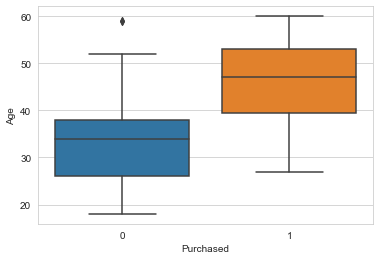

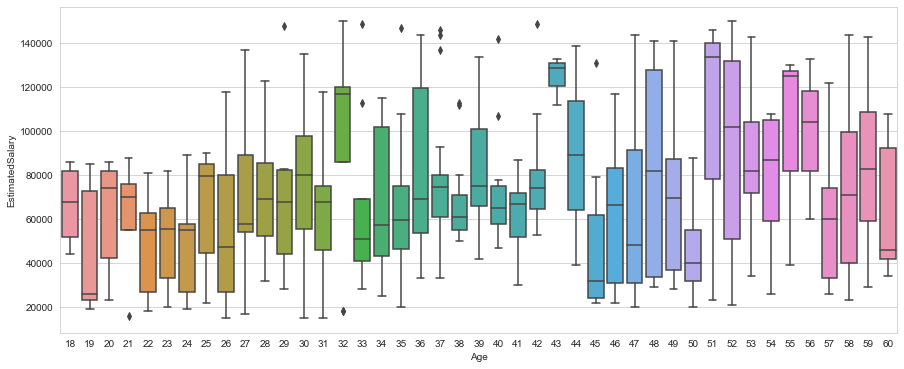

In [34]:
sns.boxplot(x='Purchased',y='Age',data=df)
plt.figure(figsize=(15,6))

sns.boxplot(x='Age',y='EstimatedSalary',data=df)


# Vizualization -Accuracy Score

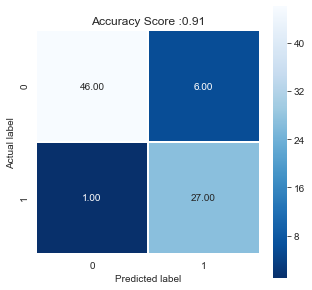

In [35]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

A=f'Accuracy Score :{acc:.2f}'

plt.title(A)


plt.show()